<a href="https://colab.research.google.com/github/kartoone/cosc470s24/blob/main/examplecode/cifar10_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget "https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz"

--2024-03-13 13:04:50--  https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
Resolving www.cs.toronto.edu (www.cs.toronto.edu)... 128.100.3.30
Connecting to www.cs.toronto.edu (www.cs.toronto.edu)|128.100.3.30|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 170498071 (163M) [application/x-gzip]
Saving to: ‘cifar-10-python.tar.gz’

cifar-10-python.tar 100%[===================>] 162.60M  33.7MB/s    in 6.1s    

2024-03-13 13:04:56 (26.7 MB/s) - ‘cifar-10-python.tar.gz’ saved [170498071/170498071]



In [ ]:
!tar -xzvf cifar-10-python.tar.gz

cifar-10-batches-py/
cifar-10-batches-py/data_batch_4
cifar-10-batches-py/readme.html
cifar-10-batches-py/test_batch
cifar-10-batches-py/data_batch_3
cifar-10-batches-py/batches.meta
cifar-10-batches-py/data_batch_2
cifar-10-batches-py/data_batch_5
cifar-10-batches-py/data_batch_1


In [ ]:
import pickle
def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

50000
50000
6
[ 59  43  50 ... 216 151 123]
[[ 59  43  50 ... 158 152 148]
 [ 16   0  18 ... 123 119 122]
 [ 25  16  49 ... 118 120 109]
 ...
 [208 201 198 ... 160  56  53]
 [180 173 186 ... 184  97  83]
 [177 168 179 ... 216 151 123]]


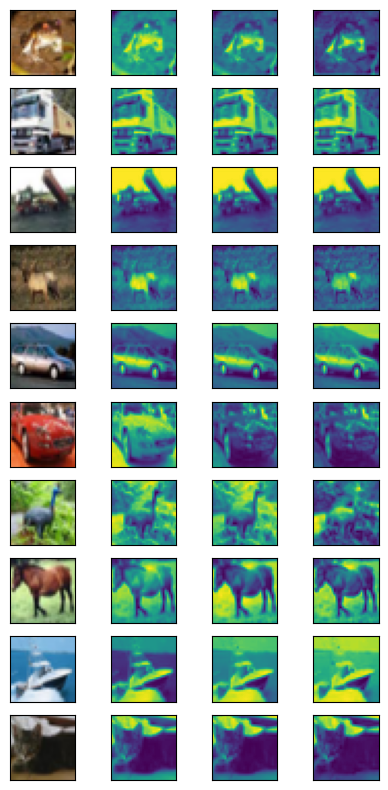

In [54]:
training = {'labels':[],'data':[]}
for i in range(1,6):
  filename = f"data_batch_{i}"
  dict = unpickle(filename)
#  print(dict)
  training['labels'].extend(dict[b'labels'])
  training['data'].extend(dict[b'data'])

print(len(training['labels']))
print(len(training['data']))
print(training['labels'][0])
print(training['data'][0][:1024])
import numpy as np
np.set_printoptions(linewidth=1000000)
print(np.reshape(training['data'][0][:1024], (32,32)))
rawtrainingdata = [d for d in training['data']]
training['data'] = np.array(training['data'])
training['data'] = training['data'].reshape(50000, 3, 32, 32).transpose(0,2,3,1).astype("uint8")

import matplotlib.pyplot as plt
fig, axes = plt.subplots(10, 4, figsize=(5,10))
for i in range(10):
  axes[i,0].imshow(training['data'][i])
  axes[i,1].imshow(np.reshape(rawtrainingdata[i][:1024],(32,32)))
  axes[i,2].imshow(np.reshape(rawtrainingdata[i][1024:2048],(32,32)))
  axes[i,3].imshow(np.reshape(rawtrainingdata[i][2048:],(32,32)))
  for c in range(4):
    axes[i,c].set_xticks([])
    axes[i,c].set_yticks([])

In [55]:
!git clone https://github.com/kartoone/DeepLearningPython nn
import numpy as np
import nn.network as network
net_RED = network.Network([1024, 30, 10])
net_GREEN = network.Network([1024, 30, 10])
net_BLUE = network.Network([1024, 30, 10])

# modify the rawtrianing data labels so that they are vectorized
# create three sets of training data ... one set is the RED training data, etc...
net_RED.SGD(red_training_data, 30, 10, 3.0, test_data=test_data)
a = net.feedforward(test_data[0][0])

Cloning into 'nn'...
remote: Enumerating objects: 80, done.
remote: Counting objects: 100% (25/25), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 80 (delta 11), reused 5 (delta 1), pack-reused 55
Receiving objects: 100% (80/80), 16.44 MiB | 25.63 MiB/s, done.
Resolving deltas: 100% (38/38), done.
